<a href="https://colab.research.google.com/github/irinap9270/hg_ml/blob/main/Ch8-2.%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패션 MNIST 데이터 불러오기

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


# 합성곱 신경망 만들기

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

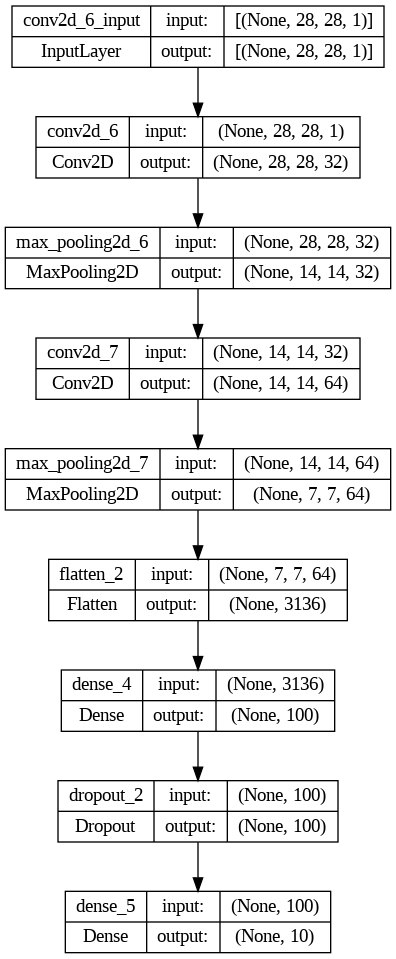

In [6]:
# 모델 선언
model = keras.Sequential()

# 합성곱 층1 추가 ; 3*3 필터 32개
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
# 풀링 층1 추가
model.add(keras.layers.MaxPooling2D(2))
# 합성곱, 풀링 층2 추가
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

# 3차원 feature map을 일렬로 펼침
model.add(keras.layers.Flatten())
# 밀집 층 추가
model.add(keras.layers.Dense(100, activation='relu'))
# 과대적합 막음
model.add(keras.layers.Dropout(0.4))
# 다중 분류 문제 확률 나타냄
model.add(keras.layers.Dense(10, activation='softmax'))

# 모델 구조 출력
model.summary()
# 모델 구조 그림 출력
keras.utils.plot_model(model, show_shapes=True)

# 모델 컴파일, 훈련

In [8]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# 최상의 모델 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
# 조기 종료 설정
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

# 모델 학습
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 14s 5ms/step - loss: 0.5030 - accuracy: 0.8196 - val_loss: 0.3170 - val_accuracy: 0.8812
Epoch 2/20
  33/1500 [..............................] - ETA: 4s - loss: 0.3421 - accuracy: 0.8703

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 6s 4ms/step - loss: 0.3327 - accuracy: 0.8815 - val_loss: 0.2689 - val_accuracy: 0.8988
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2820 - accuracy: 0.8976 - val_loss: 0.2499 - val_accuracy: 0.9069
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2518 - accuracy: 0.9091 - val_loss: 0.2297 - val_accuracy: 0.9137
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2263 - accuracy: 0.9181 - val_loss: 0.2345 - val_accuracy: 0.9122
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2072 - accuracy: 0.9241 - val_loss: 0.2224 - val_accuracy: 0.9203
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1899 - accuracy: 0.9290 - val_loss: 0.2159 - val_accuracy: 0.9232
Epoch 8/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1762 - accuracy: 0.9334 - val_loss: 0.2225 - val_accuracy: 0.9202
Epo

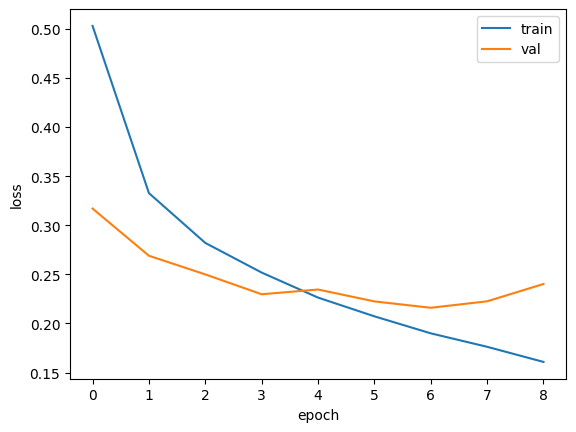

375/375 [==============================] - 1s 2ms/step - loss: 0.2159 - accuracy: 0.9232


[0.21594589948654175, 0.9231666922569275]

In [10]:
# 손실 그래프 출력
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 훈련 세트에 대한 정확도 출력
model.evaluate(val_scaled, val_target)

# 새로운 데이터에 대해 예측해보자

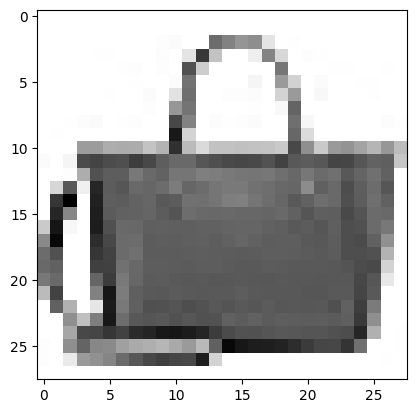

1/1 [==============================] - 0s 17ms/step
[[6.6730237e-19 2.0128510e-27 1.0940012e-19 6.3996506e-22 5.9069665e-19
  1.0773401e-19 1.0142400e-18 3.3166376e-23 1.0000000e+00 1.3563567e-22]]


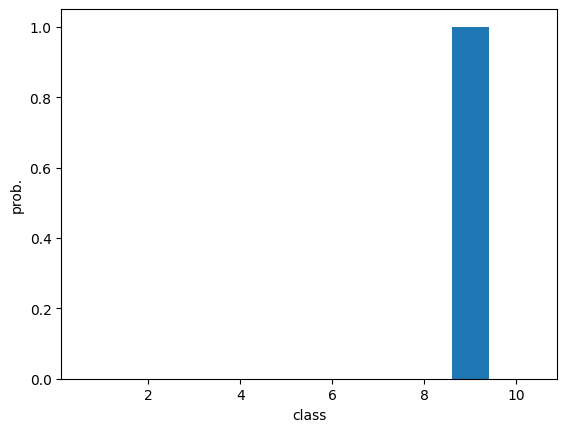

가방
313/313 [==============================] - 1s 3ms/step - loss: 0.2402 - accuracy: 0.9151


[0.24019284546375275, 0.9150999784469604]

In [12]:
# 처음 본 이미지 가정
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

# 위의 이미지에 대한 예측 출력
preds = model.predict(val_scaled[0:1])
print(preds)

# 막대 그래프로 확인
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

# 리스트에 레이블 저장
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
import numpy as np
print(classes[np.argmax(preds)])

# 테스트 세트로 일반화 성능 측정
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)